# Checkpoint 3

## Part 1 : Preprocessing part

### A - Explore Data 

In [1]:
#Import Libraries

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import numpy as np
import pandas as pd

In [2]:
#Reading File
data = pd.read_csv(r'C:\Users\stesa\Desktop\GoMyCode\titanic-passengers.csv',sep=';')

#Put it in DataFrame
data_frame = pd.DataFrame(data)

#Display data
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
#Data Length
data_frame.shape

(891, 12)

In [4]:
#Data description
data_frame.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data_frame['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
#Display first 10 lines
data_frame.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [7]:
#Display last 10 lines
data_frame.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,699,No,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
882,775,Yes,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S
883,809,No,2,"Meyer, Mr. August",male,39.0,0,0,248723,13.0000,NaN,S
884,278,No,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
885,150,No,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


In [8]:
#Columns info
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [9]:
#Describe Age column
data_frame['Age'].describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
#Describe Output (Target) Column
data_frame['Survived'].value_counts()

No     549
Yes    342
Name: Survived, dtype: int64

### B - Data Cleaning

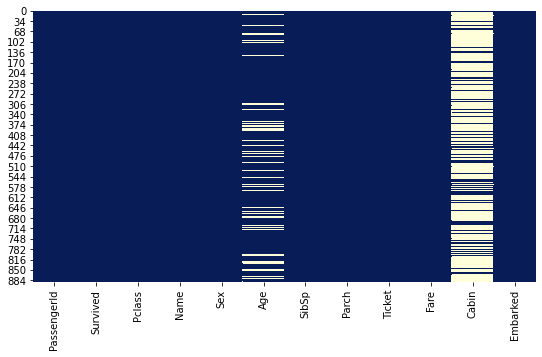

In [11]:
#Finding Missing Values

fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(data.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [12]:
#Counting missing values
data_frame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#Drop two rows containing NaN in 'Embarked' Column
data_frame.dropna(axis=0, subset=['Embarked'], inplace=True)

In [14]:
#Counting missing values
data_frame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
#Drop 'Cabin' Column
data_frame.drop('Cabin', axis=1, inplace=True)

In [16]:
#Counting missing values
data_frame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [17]:
#Replacing NaN in 'Age' with mean
data_frame['Age'].fillna(data_frame['Age'].mean(), inplace=True)

In [18]:
data_frame['Age'].describe()

count    889.000000
mean      29.642093
std       12.968346
min        0.420000
25%       22.000000
50%       29.642093
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
#Verification step
data_frame.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Part 1 : Visualization part

### A - Variable Distribution


---

## Between Survived and Pclass

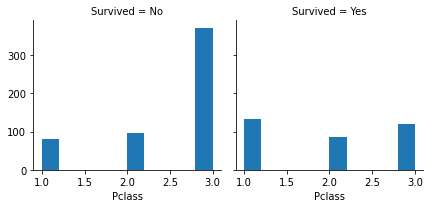

In [20]:
#Correlation between Survived and Pclass 

grid = sns.FacetGrid(data_frame, col='Survived')
grid.map(plt.hist, 'Pclass')
grid.add_legend()

## Between Sex and Age

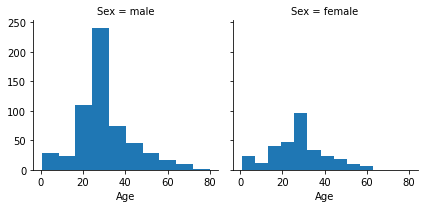

In [21]:
#Correlation between Sex and Age 


grid = sns.FacetGrid(data_frame, col='Sex')
grid.map(plt.hist,'Age')

## Age with respect to Pclass


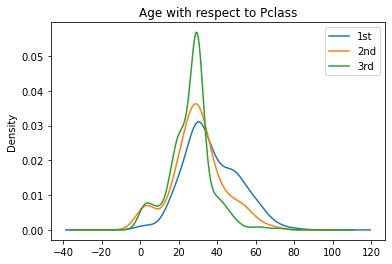

In [22]:

for x in [1,2,3]:    ## for 3 classes
    data_frame.Age[data_frame.Pclass == x].plot(kind="kde")
plt.title("Age with respect to Pclass")
plt.legend(("1st","2nd","3rd"))


## Survived as Function of Age and Pclass


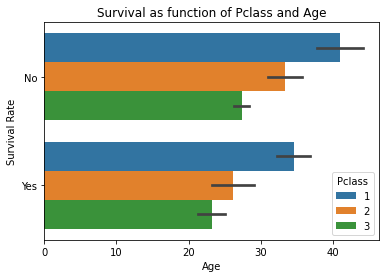

In [23]:

sns.barplot(x='Age', y='Survived', hue='Pclass', data=data_frame)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Age")
plt.show()

---

#### --------------------------------------------| Histogram |-------------------------------------------------------------

---------------------------

<AxesSubplot:title={'center':'Histogram of different Ages'}, xlabel='Age', ylabel='Frequency'>

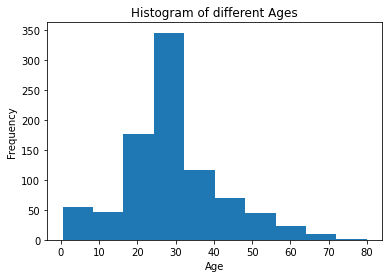

In [24]:
#'Age' Distribution with Histogram

plt.title('Histogram of different Ages')
plt.xlabel('Age')
data_frame['Age'].plot.hist()

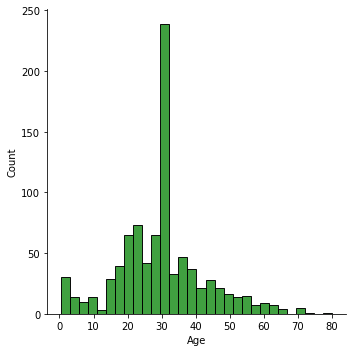

In [25]:
#'Age' Distribution with Histogram seaborn

sns.displot(data_frame['Age'], kind='hist', color='green')

<AxesSubplot:title={'center':'Histogram of different Pclass'}, xlabel='Pclass', ylabel='Frequency'>

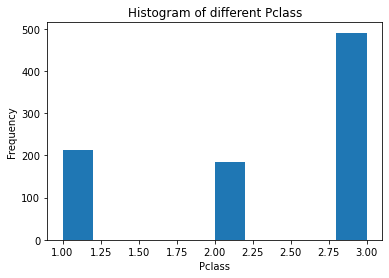

In [26]:
#'Pclass' Distribution with Histogram

plt.title('Histogram of different Pclass')
plt.xlabel('Pclass')
data_frame['Pclass'].plot.hist()

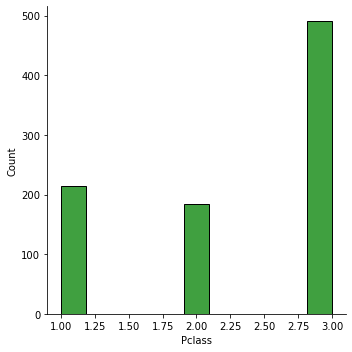

In [27]:
#'Pclass' Distribution with Histogram seaborn

sns.displot(data_frame['Pclass'],  kind='hist', color='green')


--------------

#### --------------------------------------------| Barplot |-----------------------------------------------------------------

--------------

<AxesSubplot:title={'center':'Barplot'}, xlabel='Survived', ylabel='Survived Value Count'>

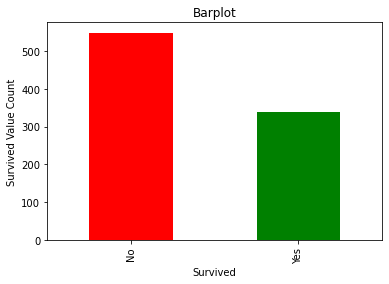

In [28]:
#Barplot 'Survived' Column

plt.xlabel('Survived')
plt.ylabel('Survived Value Count')
plt.title('Barplot')

counts = data_frame['Survived'].value_counts()
counts.plot.bar(color=['red','green'])

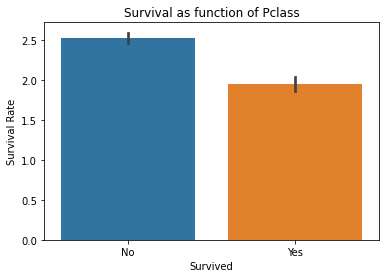

In [29]:
sns.barplot(x='Survived', y='Pclass', data=data_frame)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

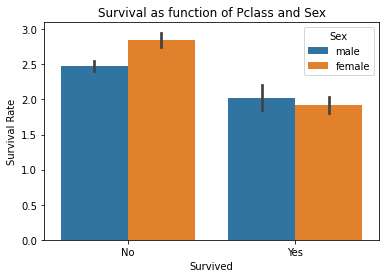

In [30]:

sns.barplot(x='Survived', y='Pclass', hue='Sex', data=data)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()

----------

#### --------------------------------------------| Boxplot |-----------------------------------------------------------------

---

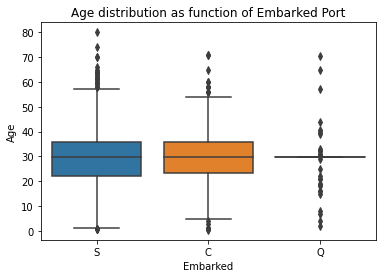

In [31]:
sns.boxplot(x='Embarked', y='Age', data=data_frame)
plt.title("Age distribution as function of Embarked Port")
plt.show()

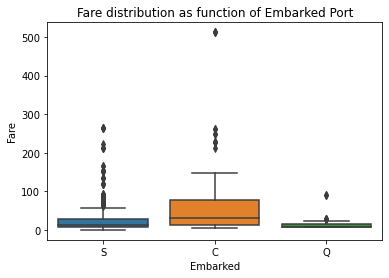

In [32]:
sns.boxplot(x='Embarked', y='Fare', data=data_frame)
plt.title("Fare distribution as function of Embarked Port")
plt.show()

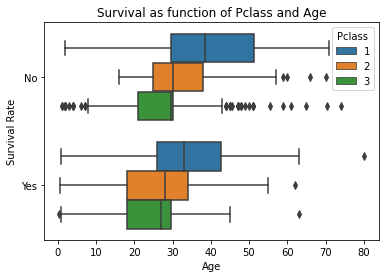

In [33]:
sns.boxplot(x='Age', y='Survived', hue='Pclass', data=data_frame)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Age")
plt.show()

### A - Variable Correlation


## LabelEncoder

In [34]:
#Replacing Survived with 0 and 1

encoder = LabelEncoder()
data_frame['Survived'] = encoder.fit_transform(data_frame['Survived'])
data_frame['Survived'].value_counts()


0    549
1    340
Name: Survived, dtype: int64

In [35]:
def plot_correlation_map( df ):

    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = 
                    { 'fontsize' : 12 } )
    
    

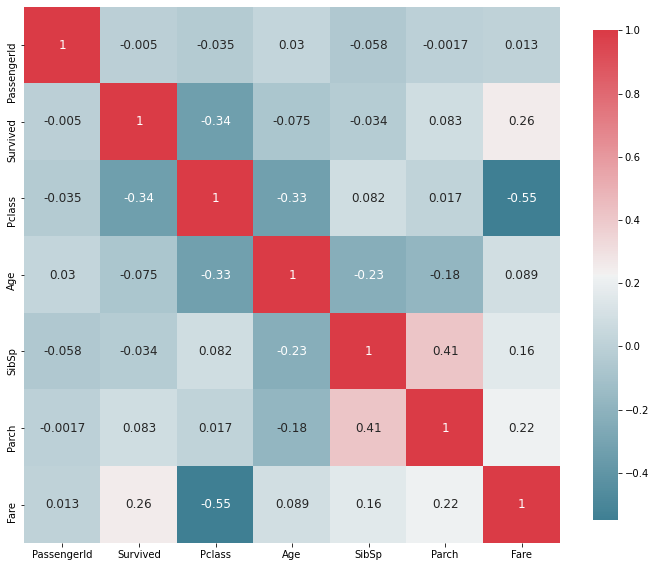

In [36]:
plot_correlation_map(data_frame)

In [37]:
# This graph display the pairwise correlation of all numeric data type columns in the dataframe.

# Correlation > 0 

# -----------------------------
# We observe a weak positive linear relationship between Parch and SibSp. If Parch Feature goes up the SibSp Feature goes up also with 41%
# There is a weak positive linear relationship between Survived and Fare. If Fare Feature goes up the Survived Feature goes up with 26%
# -----------------------------

# Correlation = 0 

# -----------------------------
# There is no correlation positive or negative between PassengerId and All other Features
# There is no correlation positive or negative between Survived and (Age | SibSp | Parch)
# -----------------------------

# Correlation < 0

# -----------------------------
# There is a weak negative linear relationship between (Pclass and Survived) & (Pclass and Age) & (Age and SibSp) 
# There is a moderate negative relationship between Pclass and Fare. If one feature goes up, the other goes down.
# -----------------------------

# Correlation = 1

# -----------------------------
# There is a perfect positive linear relationship
# -----------------------------

---

## Groupby Function

---

#### GroupBy Pclass

---

In [38]:
data_frame[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


---

#### GroupBy Sex

---

In [39]:
data_frame[["Sex", "Survived"]].groupby(["Sex"], as_index=True).mean()

,Survived
Sex,
female,0.740385
male,0.188908


---

In [40]:
#Add 'Title' Column

data_frame['Title'] = data_frame.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
data_frame['Title'].head()


0     Mr
1     Mr
2     Mr
3    Mrs
4     Mr
Name: Title, dtype: object

In [41]:
#Counts Value 'Title'
data_frame['Title'].value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Lady              1
the Countess      1
Ms                1
Capt              1
Mme               1
Don               1
Jonkheer          1
Sir               1
Name: Title, dtype: int64

In [42]:
#Drop 'Name' Column

data_frame.drop('Name', axis = 1, inplace = True)
data_frame.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,male,28.0,0,0,248740,13.0000,S,Mr
1,76,0,3,male,25.0,0,0,348123,7.6500,S,Mr
2,641,0,3,male,20.0,0,0,350050,7.8542,S,Mr
3,568,0,3,female,29.0,0,4,349909,21.0750,S,Mrs
4,672,0,1,male,31.0,1,0,F.C. 12750,52.0000,S,Mr


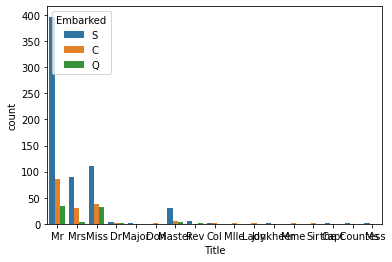

In [43]:
#Title with Embarked

sns.countplot(x="Title", hue="Embarked", data = data_frame)
plt.show()

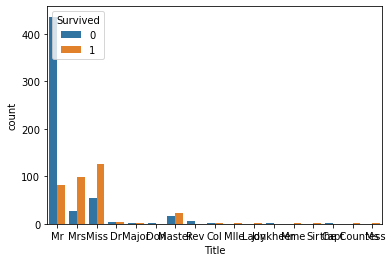

In [44]:
#Title with Survived

sns.countplot(x="Title", hue="Survived", data = data_frame)
plt.show()

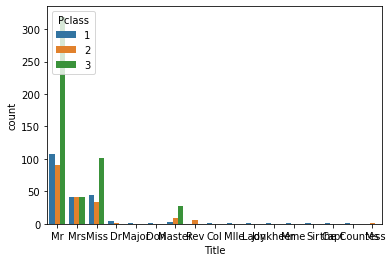

In [45]:
#Title with Pclass

sns.countplot(x="Title",  hue="Pclass", data = data_frame)
plt.show()

In [46]:
data_frame['Title'].value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Lady              1
the Countess      1
Ms                1
Capt              1
Mme               1
Don               1
Jonkheer          1
Sir               1
Name: Title, dtype: int64

In [47]:
#Create new Dictionary

Title_Dictionary =  {
    
                    "Capt":"Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Dr":"Officer",
                    "Rev":"Officer",
                    "Jonkheer":"Royalty",
                    "Don":"Royalty",
                    "Sir":"Royalty",
                    "Lady":"Royalty",
                    "the Countess":"Royalty",
                    "Mme":"Miss",
                    "Mlle":"Miss",
                    "Miss":"Miss",
                    "Ms":"Mrs",
                    "Mr":"Mrs",
                    "Mrs":"Mrs",
                    "Master":"Master"
    
                    }
data_frame['Title'] = data_frame['Title'].map(Title_Dictionary)


In [48]:
data_frame['Title'].value_counts()


Mrs        642
Miss       184
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [49]:
data_frame['Title'].head()

0    Mrs
1    Mrs
2    Mrs
3    Mrs
4    Mrs
Name: Title, dtype: object

In [50]:
pd.crosstab([data_frame["Title"], data_frame["Survived"]], data_frame["Pclass"], margins = True).style.background_gradient(cmap = "summer_r")

In [51]:
pd.crosstab([data_frame["Title"], data_frame["Survived"]], data_frame["SibSp"], margins = True).style.background_gradient(cmap = "summer_r")

In [52]:
pd.crosstab([data_frame["Title"], data_frame["Survived"]], data_frame["Parch"], margins = True).style.background_gradient(cmap = "summer_r")

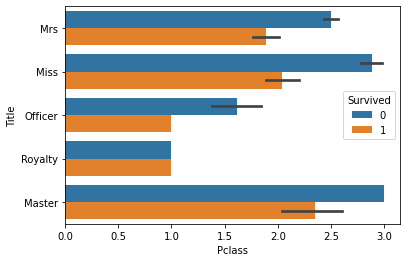

In [53]:
sns.barplot(x = "Pclass", y = "Title", hue = "Survived", data = data_frame)
plt.show()

## New Feature: FamilySize

In [54]:
#Create New Feature 'FamilySize'

data_frame["FamilySize"] = data_frame["SibSp"] + data_frame["Parch"] + 1
data_frame.head(10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,343,0,2,male,28.0,0,0,248740,13.0000,S,Mrs,1
1,76,0,3,male,25.0,0,0,348123,7.6500,S,Mrs,1
2,641,0,3,male,20.0,0,0,350050,7.8542,S,Mrs,1
3,568,0,3,female,29.0,0,4,349909,21.0750,S,Mrs,5
4,672,0,1,male,31.0,1,0,F.C. 12750,52.0000,S,Mrs,2
5,105,0,3,male,37.0,2,0,3101276,7.9250,S,Mrs,3
6,576,0,3,male,19.0,0,0,358585,14.5000,S,Mrs,1
7,382,1,3,female,1.0,0,2,2653,15.7417,C,Miss,3
8,228,0,3,male,20.5,0,0,A/5 21173,7.2500,S,Mrs,1
9,433,1,2,female,42.0,1,0,SC/AH 3085,26.0000,S,Mrs,2


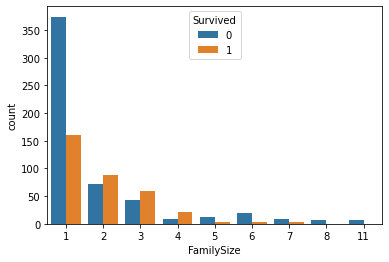

In [55]:
#Distribution between FamilySize and Survived

sns.countplot(x="FamilySize",  hue="Survived", data = data_frame)
plt.show()

In [56]:
pd.crosstab([data_frame["FamilySize"], data_frame["Embarked"]], data_frame["Survived"], margins = True).style.background_gradient(cmap = "summer_r")

In [57]:
#Correlation Groupby Titile 

data_frame[["Title", "Fare"]].groupby(["Title"], as_index=True).mean()

,Fare
Title,
Master,34.703125
Miss,43.909332
Mrs,28.366983
Officer,35.786344
Royalty,42.150000


## Data_Transformation

In [58]:
data_frame.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,343,0,2,male,28.0,0,0,248740,13.0000,S,Mrs,1
1,76,0,3,male,25.0,0,0,348123,7.6500,S,Mrs,1
2,641,0,3,male,20.0,0,0,350050,7.8542,S,Mrs,1
3,568,0,3,female,29.0,0,4,349909,21.0750,S,Mrs,5
4,672,0,1,male,31.0,1,0,F.C. 12750,52.0000,S,Mrs,2
5,105,0,3,male,37.0,2,0,3101276,7.9250,S,Mrs,3
6,576,0,3,male,19.0,0,0,358585,14.5000,S,Mrs,1
7,382,1,3,female,1.0,0,2,2653,15.7417,C,Miss,3
8,228,0,3,male,20.5,0,0,A/5 21173,7.2500,S,Mrs,1
9,433,1,2,female,42.0,1,0,SC/AH 3085,26.0000,S,Mrs,2


In [59]:
#Drop 'PassengerId' column
data_frame.drop('PassengerId', axis=1, inplace=True)

In [60]:
data_frame.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,0,2,male,28.0,0,0,248740,13.0000,S,Mrs,1
1,0,3,male,25.0,0,0,348123,7.6500,S,Mrs,1
2,0,3,male,20.0,0,0,350050,7.8542,S,Mrs,1
3,0,3,female,29.0,0,4,349909,21.0750,S,Mrs,5
4,0,1,male,31.0,1,0,F.C. 12750,52.0000,S,Mrs,2


In [61]:
#Normalize 'Embarked' Column

embarked_code = pd.get_dummies(data_frame['Embarked'])
data_frame = data_frame.drop('Embarked' , axis = 1)
data_frame = data_frame.join(embarked_code)
data_frame.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title,FamilySize,C,Q,S
0,0,2,male,28.0,0,0,248740,13.0000,Mrs,1,0,0,1
1,0,3,male,25.0,0,0,348123,7.6500,Mrs,1,0,0,1
2,0,3,male,20.0,0,0,350050,7.8542,Mrs,1,0,0,1
3,0,3,female,29.0,0,4,349909,21.0750,Mrs,5,0,0,1
4,0,1,male,31.0,1,0,F.C. 12750,52.0000,Mrs,2,0,0,1


In [62]:
#Normalize 'Sex' Column

embarked_code = pd.get_dummies(data_frame['Sex'])
data_frame = data_frame.drop('Sex' , axis = 1)
data_frame = data_frame.join(embarked_code)
data_frame.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Title,FamilySize,C,Q,S,female,male
0,0,2,28.0,0,0,248740,13.0000,Mrs,1,0,0,1,0,1
1,0,3,25.0,0,0,348123,7.6500,Mrs,1,0,0,1,0,1
2,0,3,20.0,0,0,350050,7.8542,Mrs,1,0,0,1,0,1
3,0,3,29.0,0,4,349909,21.0750,Mrs,5,0,0,1,1,0
4,0,1,31.0,1,0,F.C. 12750,52.0000,Mrs,2,0,0,1,0,1


In [63]:
#Drop 'Ticket' Column

data_frame.drop('Ticket', axis=1, inplace=True)
data_frame.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,FamilySize,C,Q,S,female,male
0,0,2,28.0,0,0,13.0000,Mrs,1,0,0,1,0,1
1,0,3,25.0,0,0,7.6500,Mrs,1,0,0,1,0,1
2,0,3,20.0,0,0,7.8542,Mrs,1,0,0,1,0,1
3,0,3,29.0,0,4,21.0750,Mrs,5,0,0,1,1,0
4,0,1,31.0,1,0,52.0000,Mrs,2,0,0,1,0,1


In [64]:
#Standardize 'Age' Column with MinMaxScaler

scaler = preprocessing.MinMaxScaler()
scaler.fit(data_frame[['Age']])
data_frame["Age2"] = scaler.fit_transform(data_frame[['Age']])
data_frame.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,FamilySize,C,Q,S,female,male,Age2
0,0,2,28.0,0,0,13.0000,Mrs,1,0,0,1,0,1,0.346569
1,0,3,25.0,0,0,7.6500,Mrs,1,0,0,1,0,1,0.308872
2,0,3,20.0,0,0,7.8542,Mrs,1,0,0,1,0,1,0.246042
3,0,3,29.0,0,4,21.0750,Mrs,5,0,0,1,1,0,0.359135
4,0,1,31.0,1,0,52.0000,Mrs,2,0,0,1,0,1,0.384267


In [65]:
data_frame.drop('Age' , axis = 1 , inplace = True)
data_frame.rename(columns={'Age2': 'Age'} , inplace=True)
data_frame.head()

,Survived,Pclass,SibSp,Parch,Fare,Title,FamilySize,C,Q,S,female,male,Age
0,0,2,0,0,13.0000,Mrs,1,0,0,1,0,1,0.346569
1,0,3,0,0,7.6500,Mrs,1,0,0,1,0,1,0.308872
2,0,3,0,0,7.8542,Mrs,1,0,0,1,0,1,0.246042
3,0,3,0,4,21.0750,Mrs,5,0,0,1,1,0,0.359135
4,0,1,1,0,52.0000,Mrs,2,0,0,1,0,1,0.384267


In [66]:
data_frame['Title'].value_counts()

Mrs        642
Miss       184
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [67]:
#Feature Transformation

data_frame["Title"].replace(["Mrs", "Miss", "Master", "Officer", "Royalty"], [0, 1, 2, 3, 4], inplace = True)

In [68]:
data_frame.head()

,Survived,Pclass,SibSp,Parch,Fare,Title,FamilySize,C,Q,S,female,male,Age
0,0,2,0,0,13.0000,0,1,0,0,1,0,1,0.346569
1,0,3,0,0,7.6500,0,1,0,0,1,0,1,0.308872
2,0,3,0,0,7.8542,0,1,0,0,1,0,1,0.246042
3,0,3,0,4,21.0750,0,5,0,0,1,1,0,0.359135
4,0,1,1,0,52.0000,0,2,0,0,1,0,1,0.384267
